<p style="text-align:center">
    </p>

# San Roque Lake Water quality monitoring
by Eliana Gonzalez

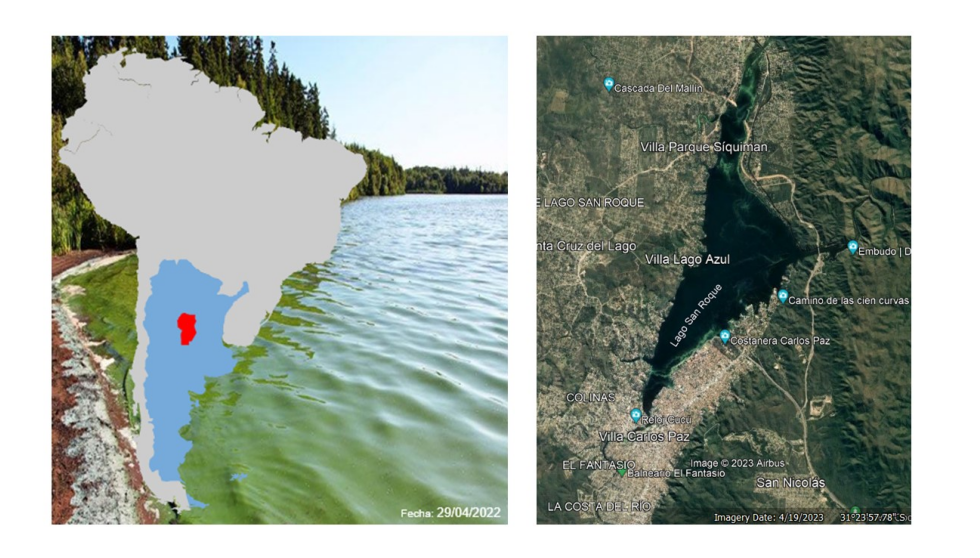

In [50]:
#CONTEXT

from matplotlib import pyplot as plt
from PIL import Image

path= 'C:/Users/Belen/Desktop/carlospaz.jpg'

carlospaz= Image.open(path)
plt.figure(figsize=(20, 10))
plt.imshow(imagen)
plt.axis('off')
plt.show()

<style>
    .rendered_html {
        background-color: white;
    }
</style>
  <strong>PROBLEM STATEMENT</strong> 
    <li>-What is the problem? The presence of algal blooms which compromises water quality</li>
    <li>-Which question would you like to address? I want to identify and quantify the extention of the algal blomms to monitor SRlake..</li>
    <li>-What information is missing to answer this question? I need algal bloom maps.</li>
    <li>-What data do you have available? -April 2021. Landsat and Sentinel images. </li>
    <li>-Do you have training data available? No</li>    
</ol>

<strong>ROAD MAP</strong> 
1. [Download sentinel-2](#dw)
2. [ARD](#da)
3. [Explore sentinel-2](#sda)
4. [water masking](#sda)
5. [[Chl-a] calculation](#md)
6. [NDCI  calculation](#md)


In [15]:
#packages
from osgeo import gdal
import os
gdal.UseExceptions()
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from rasterio.plot import show

In [1]:
#1 DOWNLOAD S2
#Sentinel sat API (FAILED)

import ee
ee.Authenticate()
ee.Initialize()

# Roi (https://geojson.io/#map=2/0/20)
roi = ee.Geometry.Polygon([[[-64.52199677151562, -31.335797652591562],
                           [-64.41899994534374, -31.335797652591562],
                           [-64.41899994534374, -31.437205227724238],
                           [-64.52199677151562, -31.437205227724238],
                           [-64.52199677151562, -31.335797652591562]]])

start_date = '2021-04-01'
end_date = '2021-04-30'
image_collection = ee.ImageCollection('COPERNICUS/S2_SR') \
    .filterBounds(roi) \
    .filterDate(start_date, end_date)

# List available sentinel2
images_list = image_collection.toList(image_collection.size())

# information of each image
for i in range(images_list.size().getInfo()):
    image = ee.Image(images_list.get(i))
    print(f'ID {i+1}:', image.id().getInfo())
    print('Date:', ee.Date(image.get('system:time_start')).format().getInfo())


Enter verification code: 4/1AfJohXlfMLiZqgIr89nrZCcTxWpolGNs_hifFTby-6B7Gv1AUm_j0EkpeBA

Successfully saved authorization token.
ID 1: 20210402T141731_20210402T143056_T20JLL
Date: 2021-04-02T14:31:20
ID 2: 20210404T141049_20210404T141920_T20JLL
Date: 2021-04-04T14:21:25
ID 3: 20210407T141729_20210407T142427_T20JLL
Date: 2021-04-07T14:31:20
ID 4: 20210409T141041_20210409T141841_T20JLL
Date: 2021-04-09T14:21:23
ID 5: 20210412T141731_20210412T143011_T20JLL
Date: 2021-04-12T14:31:18
ID 6: 20210414T141039_20210414T141042_T20JLL
Date: 2021-04-14T14:21:23
ID 7: 20210417T141729_20210417T142950_T20JLL
Date: 2021-04-17T14:31:19
ID 8: 20210419T141041_20210419T141801_T20JLL
Date: 2021-04-19T14:21:22
ID 9: 20210422T141731_20210422T142415_T20JLL
Date: 2021-04-22T14:31:19
ID 10: 20210424T141039_20210424T141040_T20JLL
Date: 2021-04-24T14:21:22
ID 11: 20210427T141729_20210427T142942_T20JLL
Date: 2021-04-27T14:31:18
ID 12: 20210429T141041_20210429T141043_T20JLL
Date: 2021-04-29T14:21:25


In [ ]:
# Folder in  Google Drive
output_folder = 'GEE_images'
os.makedirs(output_folder, exist_ok=True)

# Download 
for i in range(images_list.size().getInfo()):
    image = ee.Image(images_list.get(i))
    image_id = image.id().getInfo()
    start_date = ee.Date(image.get('system:time_start')).format().getInfo()
    output_filename = f'{start_date}_{image_id}.tif'
    output_path = os.path.join(output_folder, output_filename)
    
    task = ee.batch.Export.image.toDrive(image=image,
                                         description='sentinel_image',
                                         folder=output_folder,
                                         fileNamePrefix=output_filename,
                                         region=roi,
                                         scale=10)
    task.start()

In [49]:
#2 Analysis ready data 
#snappy (FAILED)
#preprocesing: Bulk proccesing using GPT with the command shell on Windows
##geographical and band subset + resample 

In [ ]:
#sentinel bands
#B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12
#(B2)B0 10 m 490 nm Blue 
#(B3)B1 10 m 560 nm Green
#(B4)B2 10 m 665 nm Red
#(B5)B3 20 m 705 nm Vegetation Red Edge
#(B6)B4 20 m 740 nm Vegetation Red Edge 
#(B7)B5 20 m 783 nm Vegetation Red Edge 
#(B8)B6 10 m 842 nm Near Infrared (NIR)
#(BBA)B7 20 m 865 nm Vegetation Red Edge 
#(B11)B8 20 m 1610 nm Short Wave Infrared (SWIR)
#(B12)B9 20 m 2190 nm Short Wave Infrared (SWIR)

In [70]:
#3 Exploration. Sentinel 2 April 2021
#discart images with clouds

src='C:/Users/Belen/Desktop/sentinel_1'
os.chdir(src)
ds = gdal.Open("S2A_20210412.tif")
#ds = gdal.Open("S2A_20210429.tif")
#ds = gdal.Open("S2B_20210414.tif")
#ds = gdal.Open("S2B_20210427.tif")

In [79]:
#check images

#ds.GetProjection()
#ds.RasterXSize
#ds.RasterYSize
ds.RasterCount

10

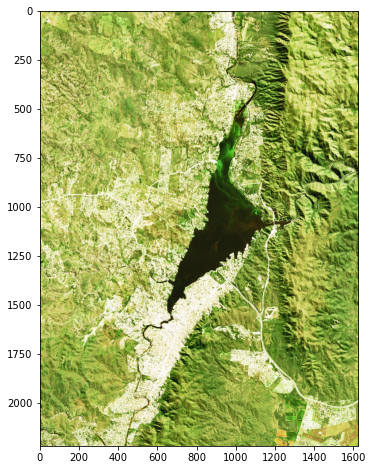

In [59]:
# Visualization

SR= 0.0001 * ds.ReadAsArray()
r= SR[2, :, :]
g= SR[1, :, :]
b= SR[0, :, :]

#RGB with contrast
rgb= np.dstack([r,g,b])
rgb= exposure.equalize_hist(rgb)
plt.figure(figsize=(20, 8))
plt.imshow(rgb)

In [60]:
#Image San Roque normal

ds2=gdal.Open('C:/Users/Belen/Desktop/sentinel_SRlake/S2A_20211115.tif')

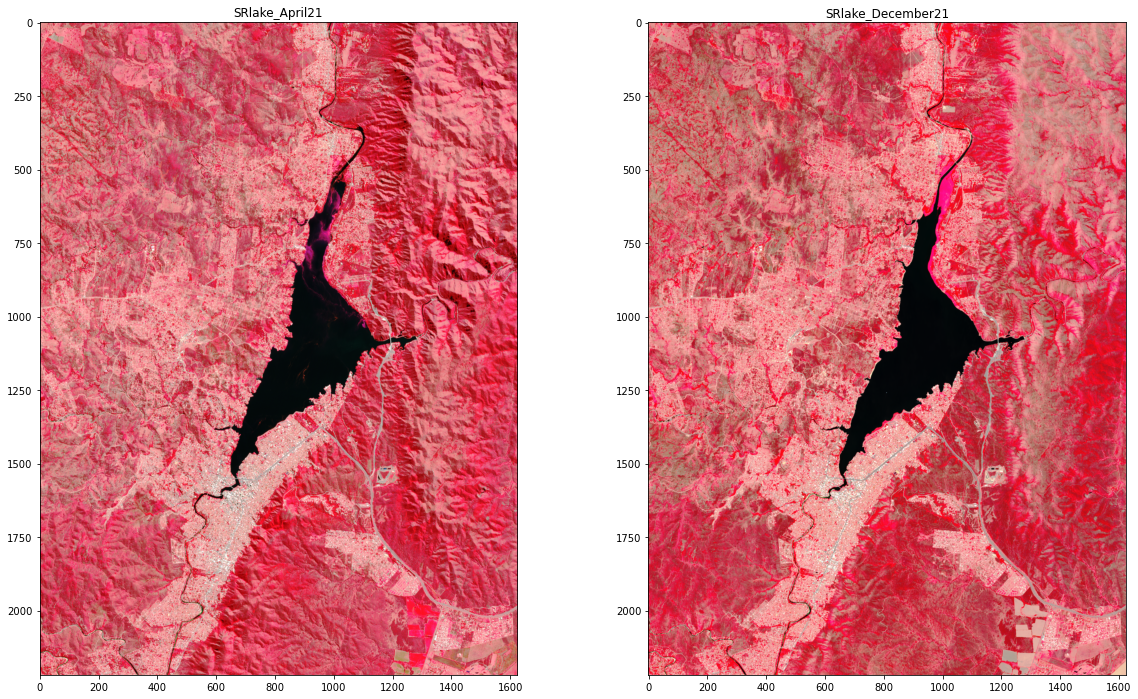

In [61]:
#Comparing "normal" and algal bloom images
SR1 = 0.0001 * ds.ReadAsArray()
r1 = SR1[6, :, :]
g1 = SR1[2, :, :]
b1 = SR1[1, :, :]
#december image
SR2 = 0.0001 * ds2.ReadAsArray()
r2 = SR2[6, :, :]
g2 = SR2[2, :, :]
b2 = SR2[1, :, :]

#NATURALCOLOR-RGB 
#FALSE COLOR nirRG

rgb1 = np.dstack([r1, g1, b1])
rgb1 = exposure.equalize_hist(rgb1)
rgb2 = np.dstack([r2, g2, b2])
rgb2 = exposure.equalize_hist(rgb2)

# Plot images together
plt.figure(figsize=(20, 12))

plt.subplot(1, 2, 1)
plt.imshow(rgb1)
plt.title('SRlake_April21')

plt.subplot(1, 2, 2)
plt.imshow(rgb2)
plt.title('SRlake_December21')
plt.show()

In [ ]:
#4 Water-NoWater mask
#INDICES: NDWI, MNDWI, NDVI
#check these results, because some times the [Chl-a] are so high in the water that this pixels are considered vegetation.

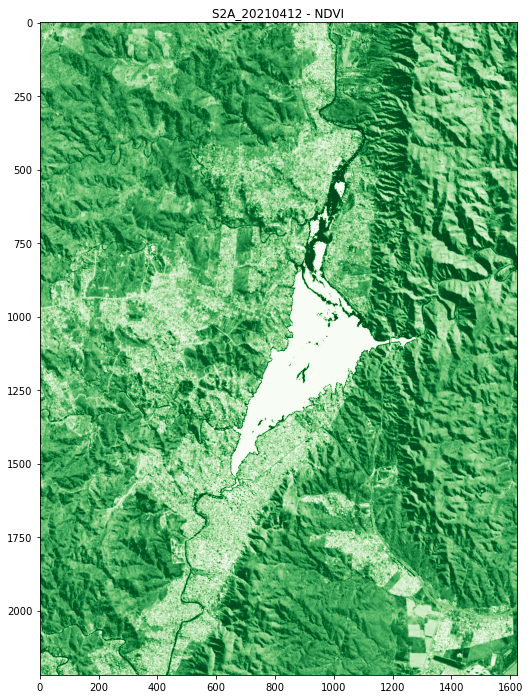

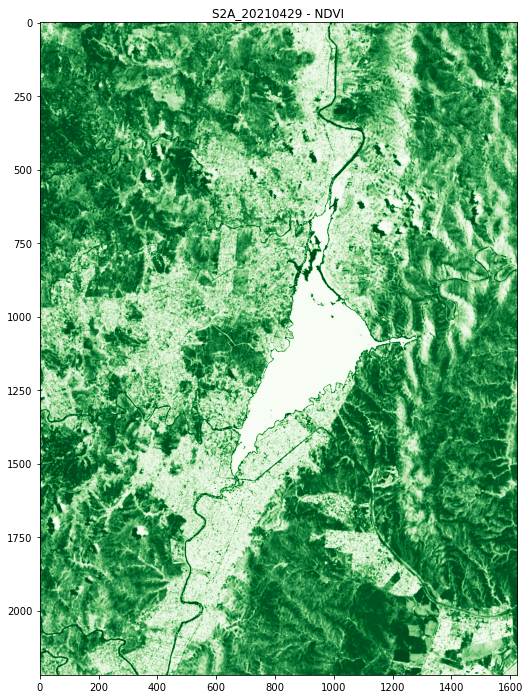

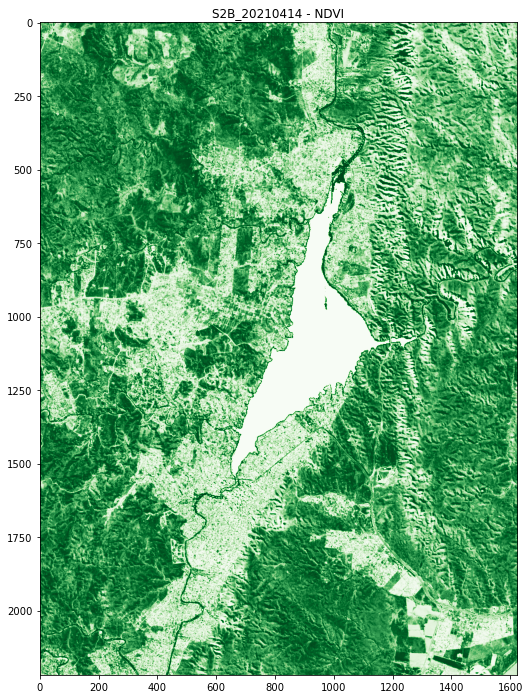

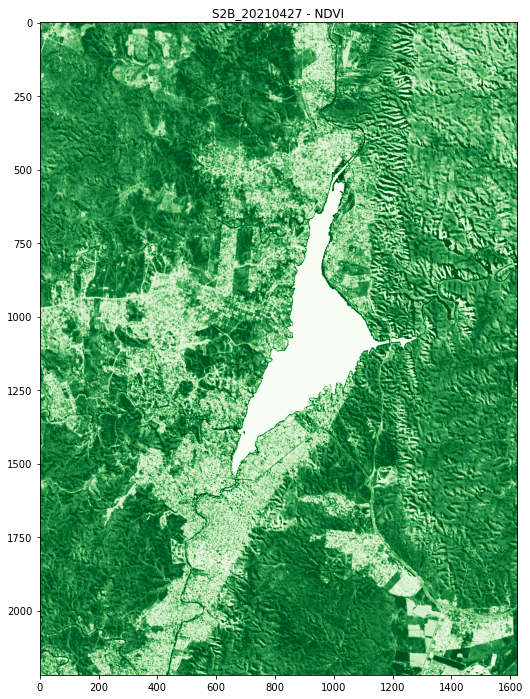

In [36]:
sentinel_folder = 'C:/Users/Belen/Desktop/sentinel_1'
tif_files = [file for file in os.listdir(sentinel_folder) if file.endswith(".tif")]

# Loop to calculate NDVIs
for file in tif_files:   
    path = os.path.join(sentinel_folder, file)
    ds = gdal.Open(path)
    red = ds.GetRasterBand(2).ReadAsArray()
    nir = ds.GetRasterBand(6).ReadAsArray()    
    ndvi = ((red - nir) / (red + nir))
    ndvi = exposure.equalize_hist(ndvi)
    
    # name original files
    name = os.path.splitext(file)[0]    
    # Plot NDVIs
    plt.figure(figsize=(20, 12))
    plt.imshow(ndvi, cmap="Greens")
    plt.title(f'{name} - NDVI')
    plt.show()  


In [ ]:
#Selected Mask 27-04-2021
#In this case, I used the last date of the month as mask.

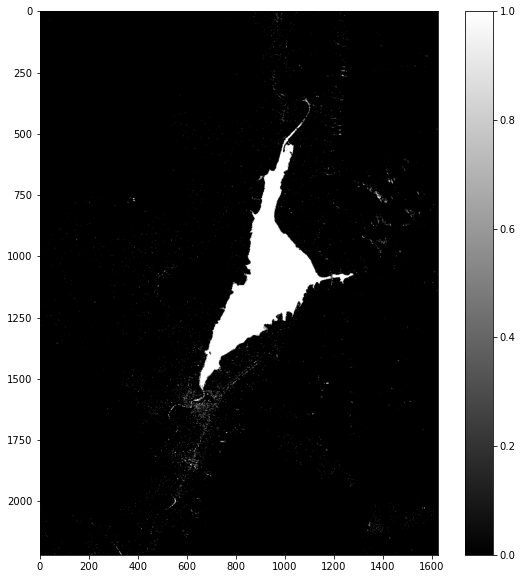

In [11]:
# Mask
image_mask = gdal.Open('C:/Users/Belen/Desktop/sentinel2/S2B_20210427.tif')
red = image_mask.GetRasterBand(2).ReadAsArray()
nir = image_mask.GetRasterBand(6).ReadAsArray()
ndvi= ((nir - red) / (nir + red))
mask_ndvi= np.where(ndvi > 0.9, 1, 0)

#plot the mask
plt.figure(figsize=(10, 10))
plt.imshow(mask_ndvi, cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.show()

#save ndvi mask
output_path = 'C:/Users/Belen/Desktop/sentinel2/mask_ndvi.tif' 
driver = gdal.GetDriverByName('GTiff')
mask_ds = driver.Create(output_path, image_mask.RasterXSize, image_mask.RasterYSize, 1, gdal.GDT_Byte)
mask_ds.SetProjection(image_mask.GetProjection())
mask_ds.SetGeoTransform(image_mask.GetGeoTransform())
mask_band = mask_ds.GetRasterBand(1)
mask_band.WriteArray(mask_ndvi)

#close data sets
original_ds = None
mask_ds = None


In [13]:
#Applied NDVI mask to sentinel2 images

sentinel_folder = 'C:/Users/Belen/Desktop/sentinel3'
mask_ndvi_path = 'C:/Users/Belen/Desktop/sentinel2/mask_ndvi.tif'

mask_ndvi_ds = gdal.Open(mask_ndvi_path)
mask_agua = mask_ndvi_ds.GetRasterBand(1).ReadAsArray()

# sentinel SR files
tif_files = [file for file in os.listdir(sentinel_folder) if file.endswith(".tif")]

for file in tif_files:   
    sentinel_path = os.path.join(sentinel_folder, file)
    sentinel_ds = gdal.Open(sentinel_path)
    # Mask to all bands
    num_bands = sentinel_ds.RasterCount
    sentinel_data_masked = np.zeros((num_bands, sentinel_ds.RasterYSize, sentinel_ds.RasterXSize))

    for i in range(num_bands):
        band = sentinel_ds.GetRasterBand(i+1).ReadAsArray()*0.0001
        sentinel_data_masked[i] = band * mask_agua

    #Save the sentinel mask
    # define name files
    output_filename = f'{os.path.splitext(file)[0]}_mask_ndvi.tif'
    output_path = os.path.join(sentinel_folder, output_filename)   
    driver = gdal.GetDriverByName('GTiff')
    out_ds = driver.Create(output_path, sentinel_ds.RasterXSize, sentinel_ds.RasterYSize, num_bands, gdal.GDT_Float32)

    for i in range(num_bands):
        out_ds.GetRasterBand(i+1).WriteArray(sentinel_data_masked[i])
        
    out_ds.SetProjection(sentinel_ds.GetProjection())
    out_ds.SetGeoTransform(sentinel_ds.GetGeoTransform())

    # Close datasets
    sentinel_ds = None
    out_ds = None

# close dataset
mask_ndvi_ds = None

C:\Users\Belen\AppData\Local\Temp\ipykernel_17440\1596178383.py:21: RuntimeWarning: invalid value encountered in true_divide
  ch = 5.57 + 80.13 * (nir/red)


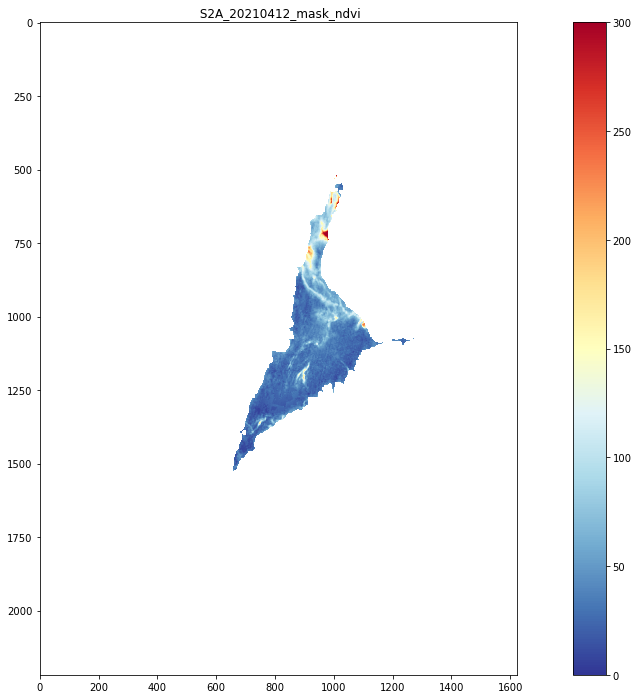

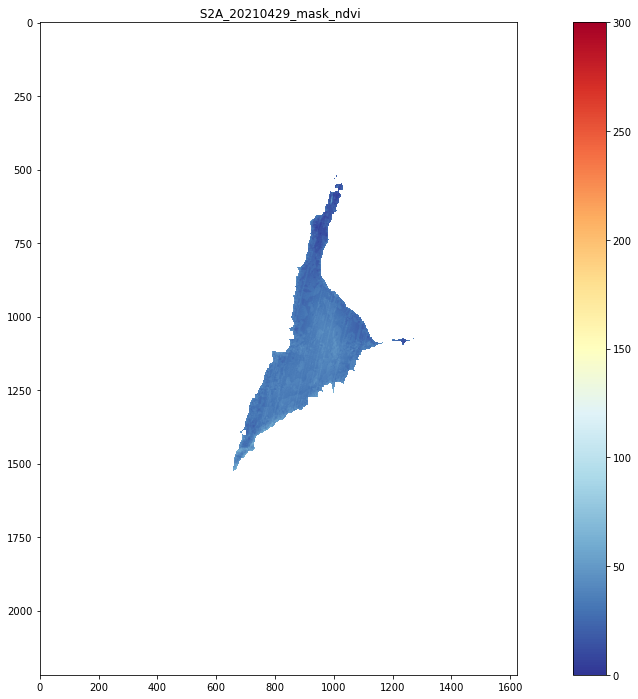

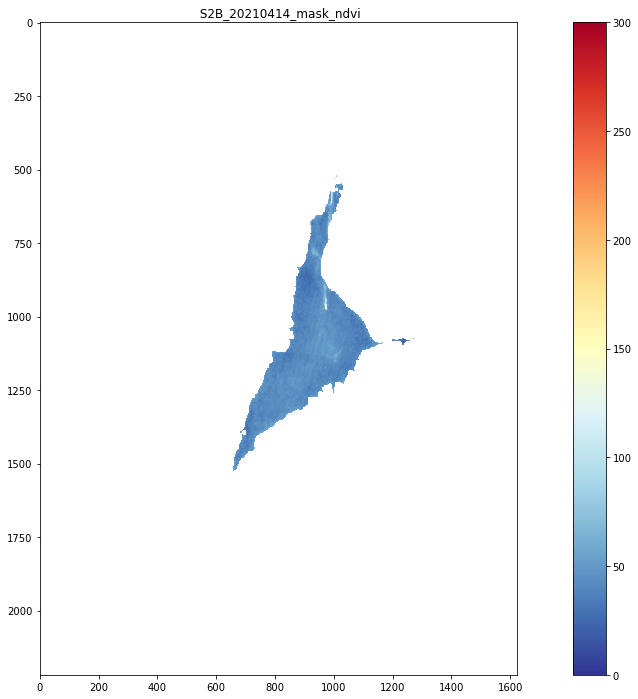

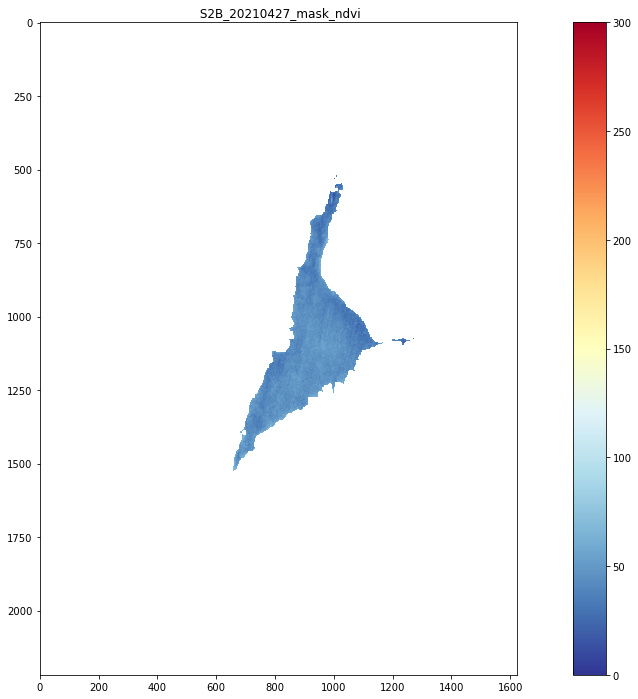

In [29]:
# 5 Calculate Chl

#SPACE-TIME MONITORING OF WATER QUALITY IN AN EUTROPHIC RESERVOIR USING SENTINEL-2 DATA - A CASE STUDY OF SAN ROQUE
#German et al., 2021. Remote sensing Applications: Society and Environment.https://doi.org/10.1016/j.rsase.2021.100614
#This study uses a large temporal series of Sentinel-2 (S2; 2016 till 2019) images to characterize the temporal and 
#spatial distribution of chlorophyll-a [Chla] in San Roque Reservoir, Cordoba Province, Argentina. A robust method that combines empirical modelling of
#[Chl-a] and data mining analysis is employed.

#[Chl-a] = 5.57 + 80.13∗band8/band4
#mg/m3


sentinel_folder = 'C:/Users/Belen/Desktop/sentinel4'
tif_files = [file for file in os.listdir(sentinel_folder) if file.endswith("_mask_ndvi.tif")]

for file in tif_files:   
    sentinel_path = os.path.join(sentinel_folder, file)
    sentinel_ds = gdal.Open(sentinel_path)
    red = sentinel_ds.GetRasterBand(2).ReadAsArray()
    nir = sentinel_ds.GetRasterBand(6).ReadAsArray()    
    ch = 5.57 + 80.13 * (nir/red)

    # Adjust max and min
    ch = np.clip(ch, 0, 300)
    
    # Extract the original file name
    original_filename = os.path.splitext(file)[0] 

    plt.figure(figsize=(20, 12))
    plt.imshow(ch, cmap="RdYlBu_r", vmin=0, vmax=300)
    plt.colorbar()
    plt.title(f' {original_filename}')  
    plt.show()


C:\Users\Belen\AppData\Local\Temp\ipykernel_17440\1667615023.py:15: RuntimeWarning: invalid value encountered in true_divide
  NDCI=(red-RE)/(red+RE)


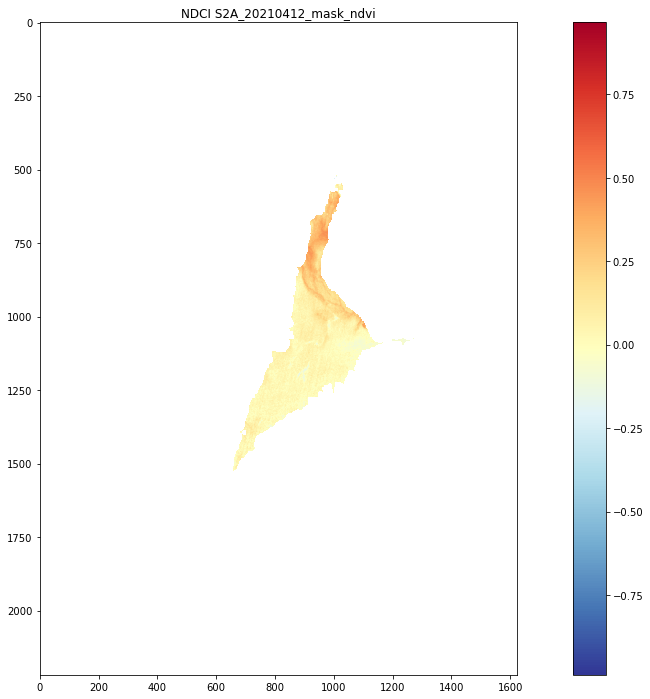

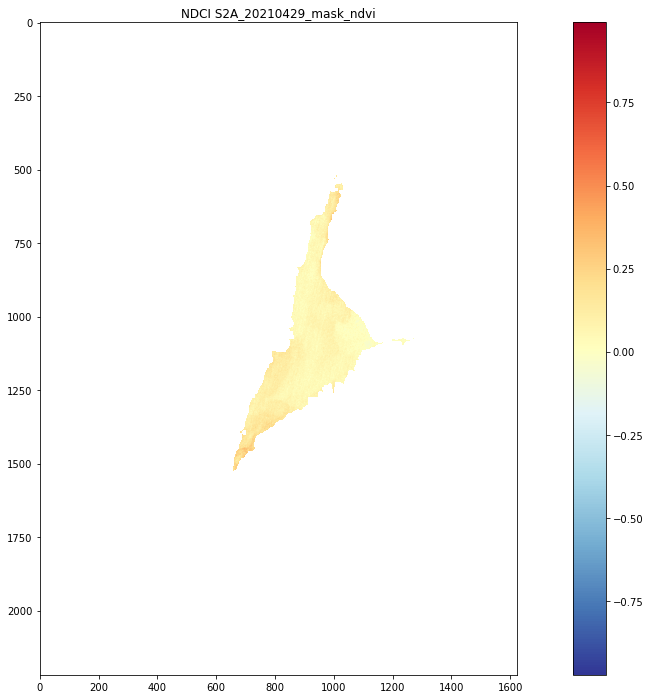

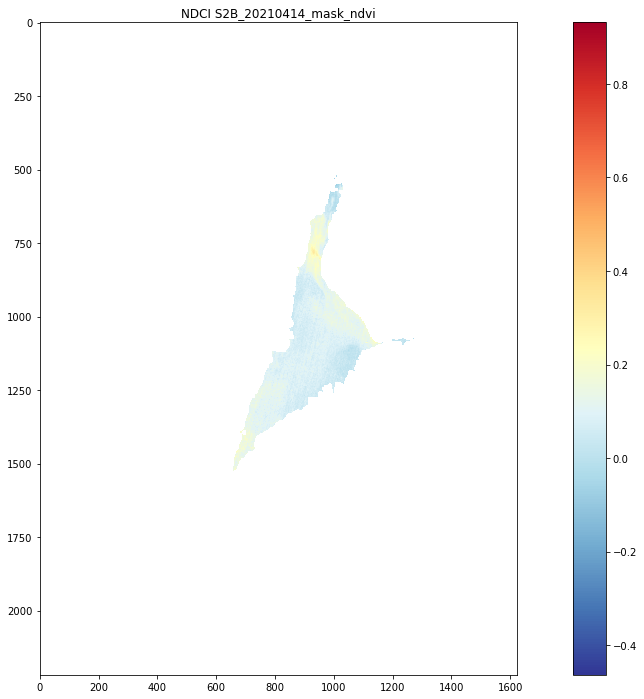

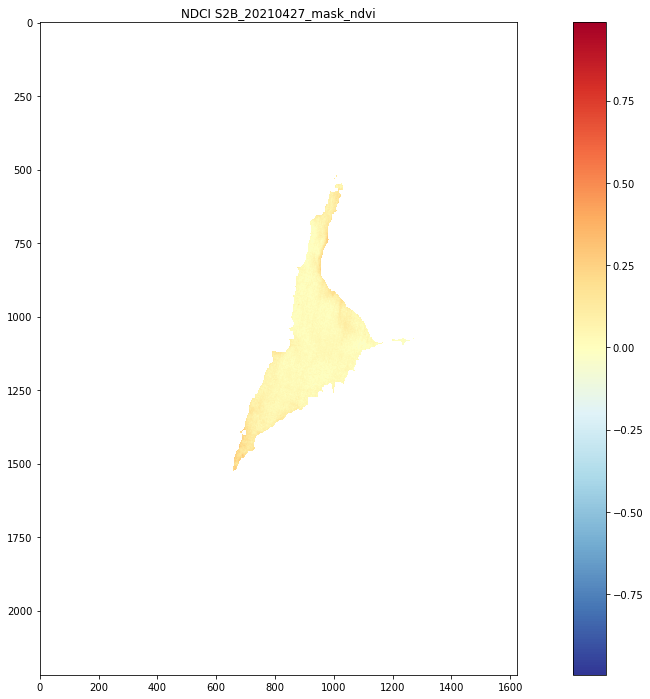

In [38]:
#The NDCI (Normalized Difference Chlorophyll Index) is a remote sensing index used to estimate chlorophyll concentration
#in bodies of water, such as lakes and oceans. This index is based on the normalized difference between reflectance 
#at two specific wavelengths, typically in the red and near-infrared spectrum
#Mishra and Mishra, 2012 (https://doi.org/10.1016/j.rse.2011.10.016)

   
sentinel_folder = 'C:/Users/Belen/Desktop/sentinel5'
tif_files = [file for file in os.listdir(sentinel_folder) if file.endswith("_mask_ndvi.tif")]


for file in tif_files:   
    sentinel_path = os.path.join(sentinel_folder, file)
    sentinel_ds = gdal.Open(sentinel_path)
    red = sentinel_ds.GetRasterBand(2).ReadAsArray()
    RE = sentinel_ds.GetRasterBand(3).ReadAsArray() 
    NDCI=(red-RE)/(red+RE) 

    # name original files
    original_filename = os.path.splitext(file)[0]
    plt.figure(figsize=(20, 12))
    #plt.imshow(NDCI, cmap="RdYlBu_r", vmin=0, vmax=200)
    plt.imshow(NDCI, cmap="RdYlBu_r")
    plt.title(f'NDCI {original_filename}')
    plt.colorbar()
    plt.show()


C:\Users\Belen\AppData\Local\Temp\ipykernel_17440\2454293221.py:9: RuntimeWarning: invalid value encountered in true_divide
  NDVI=(red-nir)/(red+nir)


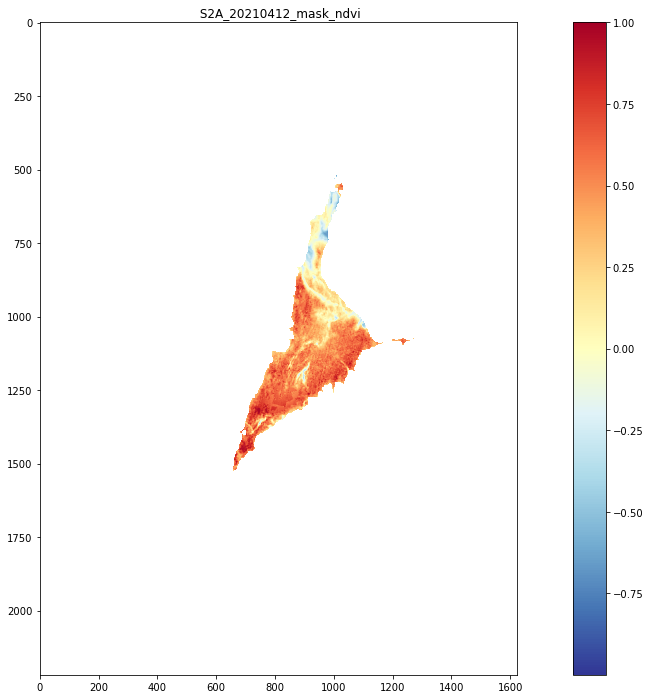

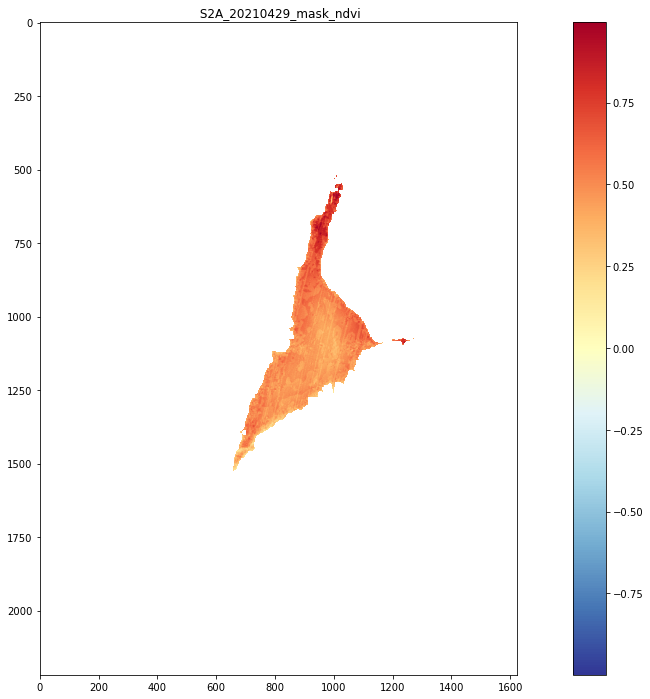

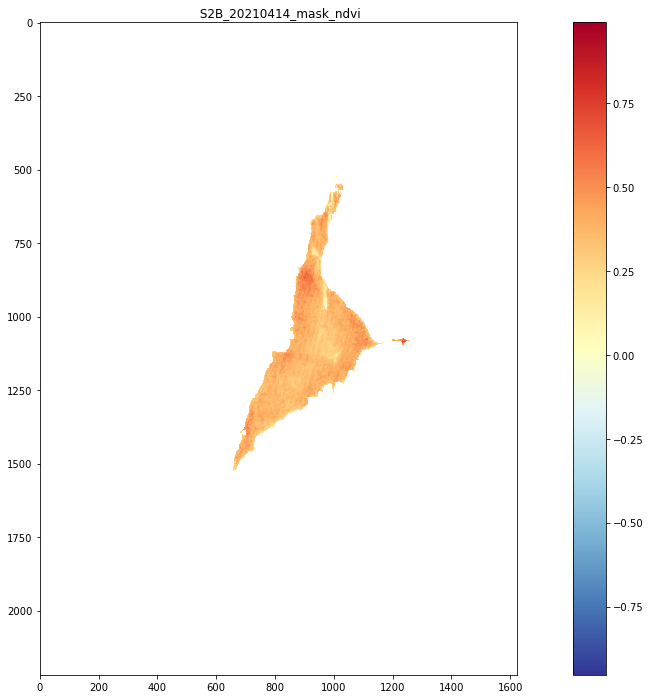

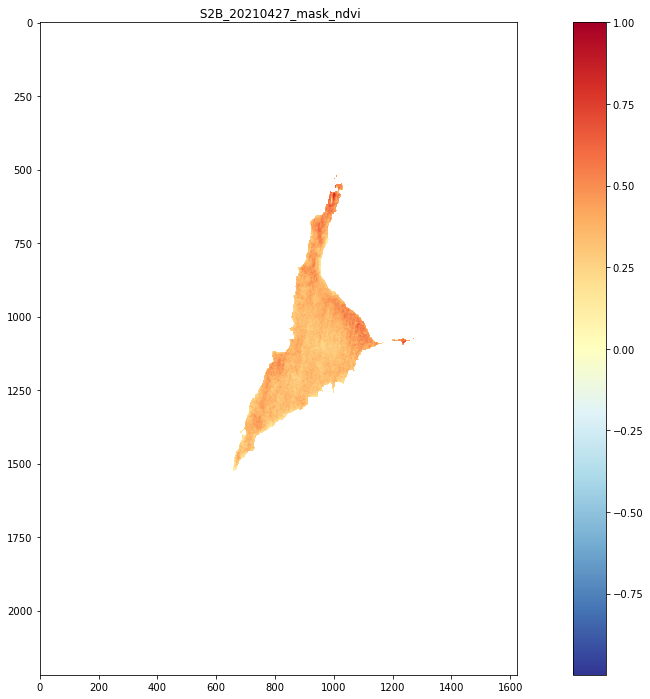

In [32]:
sentinel_folder = 'C:/Users/Belen/Desktop/sentinel4'
tif_files = [file for file in os.listdir(sentinel_folder) if file.endswith("_mask_ndvi.tif")]

for file in tif_files:   
    sentinel_path = os.path.join(sentinel_folder, file)
    sentinel_ds = gdal.Open(sentinel_path)
    red = sentinel_ds.GetRasterBand(2).ReadAsArray()
    nir= sentinel_ds.GetRasterBand(6).ReadAsArray() 
    NDVI=(red-nir)/(red+nir) 

    # name original files
    original_filename = os.path.splitext(file)[0]
    plt.figure(figsize=(20, 12))
    plt.imshow(NDVI, cmap="RdYlBu_r")
    plt.title(f' {original_filename}')
    plt.colorbar()
    plt.show()

In [22]:
import folium
from folium import plugins

# Define una ubicación central para el mapa
center = [-31.3865, -64.4700]

# Crea el mapa
m = folium.Map(location=center, zoom_start=13)

# Añade un control de capas (layers control) a la esquina superior derecha
folium.LayerControl().add_to(m)

# Añade un control de mini-mapa en la esquina inferior derecha
minimap = plugins.MiniMap(toggle_display=True)
m.add_child(minimap)

# Muestra el mapa
m